# Load the different packages into python

In [1]:
import numpy as np               # helps with working with large, multi-dimensional arrays and matrices
import pandas as pd              # helps with data manipulation and analysis
import matplotlib.pyplot as plt  # helps with plotting graphs, histogram, bar plot, etc
import seaborn as sns            # helps with statistical data visualization
%matplotlib inline

# Load the Bank Marketing Dataset into python to begin analysis

In [2]:
bank=pd.read_csv('C:/Users/User/Pictures/YorkU-Capstones/RandForest-TermDeposit-Subscriptions-Classifier/data/bank-additional-full.csv', sep=';')

Let's take a look at the dataset. It contains 41,188 entries and 21 variables.

In [3]:
bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


Statistics such as count, mean, std, etc done on the dataset with values rounded to the nearest whole number

In [4]:
round(bank.describe())

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.0,41188.0,41188.0,41188.0,41188.0,41188.0,41188.0,41188.0,41188.0,41188.0
mean,40.0,258.0,3.0,962.0,0.0,0.0,94.0,-41.0,4.0,5167.0
std,10.0,259.0,3.0,187.0,0.0,2.0,1.0,5.0,2.0,72.0
min,17.0,0.0,1.0,0.0,0.0,-3.0,92.0,-51.0,1.0,4964.0
25%,32.0,102.0,1.0,999.0,0.0,-2.0,93.0,-43.0,1.0,5099.0
50%,38.0,180.0,2.0,999.0,0.0,1.0,94.0,-42.0,5.0,5191.0
75%,47.0,319.0,3.0,999.0,0.0,1.0,94.0,-36.0,5.0,5228.0
max,98.0,4918.0,56.0,999.0,7.0,1.0,95.0,-27.0,5.0,5228.0


We find the data types for each column. The dataset contains two data types, numeric and categorical. 

In [5]:
bank.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

# Now, let's check the missing values (if present) in this data. 
The dataset has zero missing values.

In [6]:
nans = bank.shape[0] - bank.dropna().shape[0]
print ("%d rows have missing values in the data" %nans)

0 rows have missing values in the data


# Delete any duplicate rows found in the dataset. 
This left 41,164 entries which means 24 duplicated entries were found and deleted.

In [7]:
bank.drop_duplicates(keep = False, inplace = True)
bank.shape

(41164, 21)

Statistics such as count, mean, std, etc done after the duplicated entries were removed from the dataset with values rounded to the nearest whole number.

In [8]:
round(bank.describe())

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41164.0,41164.0,41164.0,41164.0,41164.0,41164.0,41164.0,41164.0,41164.0,41164.0
mean,40.0,258.0,3.0,962.0,0.0,0.0,94.0,-41.0,4.0,5167.0
std,10.0,259.0,3.0,187.0,0.0,2.0,1.0,5.0,2.0,72.0
min,17.0,0.0,1.0,0.0,0.0,-3.0,92.0,-51.0,1.0,4964.0
25%,32.0,102.0,1.0,999.0,0.0,-2.0,93.0,-43.0,1.0,5099.0
50%,38.0,180.0,2.0,999.0,0.0,1.0,94.0,-42.0,5.0,5191.0
75%,47.0,319.0,3.0,999.0,0.0,1.0,94.0,-36.0,5.0,5228.0
max,98.0,4918.0,56.0,999.0,7.0,1.0,95.0,-27.0,5.0,5228.0


# Let's count the number of unique values from character variables. 
It is interesting to note that the month variable only has ten months so no data was provided for two months.

In [9]:
cat = bank.select_dtypes(include=['O'])
cat.apply(pd.Series.nunique)

job            12
marital         4
education       8
default         3
housing         3
loan            3
contact         2
month          10
day_of_week     5
poutcome        3
y               2
dtype: int64

# Now, we'll check the target variable to investigate if this data is imbalanced or not. 
We see that almost 89% of the dataset belongs to the 'no' class. This means if we were to take a rough prediction of target variable as 'no', we'll get 89% accuracy. 

In [10]:
bank.y.value_counts()/bank.shape[0]

no     0.887329
yes    0.112671
Name: y, dtype: float64

**Let's create a cross tab of the target variable with job.**

With this, we'll try to understand the influence of job on the target variable.

In [11]:
round(pd.crosstab(bank['y'],bank['job']).apply(lambda r: r/r.sum(), axis=1)*100,2)

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
y,,,,,,,,,,,,
no,24.82,23.58,3.65,2.61,7.11,3.51,3.48,9.97,1.64,16.44,2.38,0.8
yes,29.11,13.76,2.67,2.29,7.07,9.36,3.21,6.96,5.93,15.74,3.10,0.8


**Let's create a cross tab of the target variable with marital.**

With this, we'll try to understand the influence of marital on the target variable.

In [12]:
round(pd.crosstab(bank['y'],bank['marital']).apply(lambda r: r/r.sum(), axis=1)*100,2)

marital,divorced,married,single,unknown
y,,,,
no,11.32,61.28,27.21,0.19
yes,10.26,54.55,34.93,0.26


**Let's create a cross tab of the target variable with education.**

With this, we'll try to understand the influence of education on the target variable.

In [13]:
round(pd.crosstab(bank['y'],bank['education']).apply(lambda r: r/r.sum(), axis=1)*100,2)

education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown
y,,,,,,,,
no,10.26,5.75,15.25,23.21,0.04,12.71,28.72,4.05
yes,9.23,4.05,10.20,22.23,0.09,12.83,35.96,5.41


**Let's create a cross tab of the target variable with default.**

With this, we'll try to understand the influence of default on the target variable.

In [14]:
round(pd.crosstab(bank['y'],bank['default']).apply(lambda r: r/r.sum(), axis=1)*100,2)

default,no,unknown,yes
y,,,
no,77.67,22.32,0.01
yes,90.45,9.55,0.00


**Let's create a cross tab of the target variable with housing.**

With this, we'll try to understand the influence of housing on the target variable.

In [15]:
round(pd.crosstab(bank['y'],bank['housing']).apply(lambda r: r/r.sum(), axis=1)*100,2)

housing,no,unknown,yes
y,,,
no,45.40,2.42,52.18
yes,43.64,2.31,54.05


Since about half of the people who subscribed to a term deposit have a housing loan and therefore the other half didn't have a housing loan,housing doesn't give much information on predicting who will subscribe for a term deposit so we delete the housing column from the dataset. 

In [16]:
del bank['housing']

**Let's create a cross tab of the target variable with loan.**

With this, we'll try to understand the influence of loan on the target variable.

In [17]:
round(pd.crosstab(bank['y'],bank['loan']).apply(lambda r: r/r.sum(), axis=1)*100,2)

loan,no,unknown,yes
y,,,
no,82.35,2.42,15.24
yes,82.97,2.31,14.73


**Let's create a cross tab of the target variable with contact.**

With this, we'll try to understand the influence of contact on the target variable.

In [18]:
round(pd.crosstab(bank['y'],bank['contact']).apply(lambda r: r/r.sum(), axis=1)*100,2)

contact,cellular,telephone
y,,
no,60.98,39.02
yes,83.03,16.97


**Let's create a cross tab of the target variable with month.**

With this, we'll try to understand the influence of month on the target variable.

In [19]:
round(pd.crosstab(bank['y'],bank['month']).apply(lambda r: r/r.sum(), axis=1)*100,2)

month,apr,aug,dec,jul,jun,mar,may,nov,oct,sep
y,,,,,,,,,,
no,5.72,15.11,0.25,17.84,13.03,0.74,35.26,10.08,1.10,0.86
yes,11.62,14.12,1.92,13.95,12.05,5.95,19.10,8.97,6.79,5.52


We delete the month column since the dataset doesn't have which year each month is associated with.
It should be noted that the dataset doesn't have any information on the months January and February. 

In [20]:
del bank['month']

**Let's create a cross tab of the target variable with day_of_week.**

With this, we'll try to understand the influence of day_of_week on the target variable.

In [21]:
round(pd.crosstab(bank['y'],bank['day_of_week']).apply(lambda r: r/r.sum(), axis=1)*100,2)

day_of_week,fri,mon,thu,tue,wed
y,,,,,
no,19.11,20.98,20.72,19.52,19.67
yes,18.24,18.26,22.49,20.55,20.46


There was no contact made on Saturdays and Sundays and people were last contacted roughly 20% each weekday. 
Therefore the day of the weekday they were last contacted is not important and we can remove this variable.

In [22]:
del bank['day_of_week']

# We create a new dataset 'bankno', which contains only rows where people did not subscribe for a term deposit (only show target variable 'y' where the outcome is 'no')
The mean duration of a call is 221 seconds.
The mean number of contacts performed before this campaign and with a customer is 0.132.

In [23]:
bankno=bank[bank["y"]=='no']
bankno.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,36526.000000,36526.000000,36526.000000,36526.000000,36526.000000,36526.000000,36526.000000,36526.000000,36526.000000,36526.000000
mean,39.910803,220.891365,2.633686,984.104912,0.132454,0.248894,93.603839,-40.593366,3.811472,5176.164779
std,9.896219,207.136070,2.874099,120.692646,0.409310,1.482815,0.559018,4.390363,1.638170,64.568597
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,95.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.405000,5099.100000
50%,38.000000,164.000000,2.000000,999.000000,0.000000,1.100000,93.918000,-41.800000,4.857000,5195.800000
75%,47.000000,279.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.962000,5228.100000
max,95.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


# We create a new dataset 'bankyes', which contains only rows where people subscribed for a term deposit (only show target variable 'y' where the outcome is'yes')

The mean duration of a call is 553 seconds.
The mean number of contacts performed before this campaign and with a customer is 0.493.
This shows us that the longer the call and the more number of contacts performed to a customer the likelier they will subscribe.

In [24]:
bankyes=bank[bank["y"]=='yes']
bankyes.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4638.000000,4638.000000,4638.000000,4638.000000,4638.000000,4638.000000,4638.000000,4638.000000,4638.000000,4638.000000
mean,40.911384,553.321044,2.052178,791.946313,0.492885,-1.232730,93.354768,-39.792454,2.123588,5095.124148
std,13.840200,401.209597,1.666461,403.471265,0.860469,1.623607,0.676540,6.139645,1.742837,87.590643
min,17.000000,37.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,31.000000,254.000000,1.000000,999.000000,0.000000,-1.800000,92.893000,-46.200000,0.849000,5017.500000
50%,37.000000,449.000000,2.000000,999.000000,0.000000,-1.800000,93.200000,-40.400000,1.266000,5099.100000
75%,50.000000,741.750000,2.000000,999.000000,1.000000,-0.100000,93.918000,-36.100000,4.406000,5191.000000
max,98.000000,4199.000000,23.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


**Countplot of the target variable when outcome is 'yes' with campaign (the number of contacts performed during this campaign and for this client)**

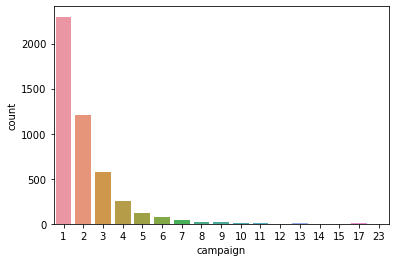

In [25]:
sns.countplot(x="campaign", data=bankyes)

**Let's create a cross tab of the target variable with pdays.**

With this, we'll try to understand the influence of pdays on the target variable.

In [26]:
round(pd.crosstab(bank['y'],bank['pdays']).apply(lambda r: r/r.sum(), axis=1)*100,2)

pdays,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,25,26,27,999
y,,,,,,,,,,,,,,,,,,,,,
no,0.01,0.05,0.07,0.39,0.15,0.05,0.34,0.05,0.02,0.08,...,0.02,0.01,0.01,0.0,0.00,0.00,0.00,0.00,0.00,98.50
yes,0.22,0.17,0.80,6.43,1.36,0.63,6.23,0.86,0.26,0.75,...,0.04,0.09,0.02,0.0,0.04,0.04,0.02,0.02,0.02,79.15


**Countplot of the target variable when outcome is 'yes' with pdays (the number of days that passed by after the client was last contacted from a previous campaign)**

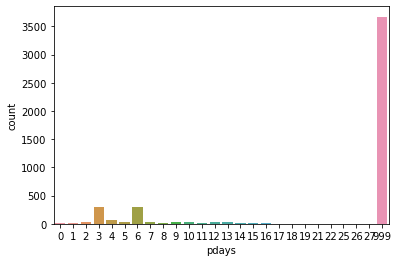

In [27]:
sns.countplot(x="pdays", data=bankyes)

999 above means client was not previously contacted. 
This value is high for both people who did subscribed and did not subscribe so we can omit this variable from the analysis.

In [28]:
del bank['pdays']

**Let's create a cross tab of the target variable with poutcome.**

With this, we'll try to understand the influence of poutcome on the target variable.

In [29]:
round(pd.crosstab(bank['y'],bank['poutcome']).apply(lambda r: r/r.sum(), axis=1)*100,2)

poutcome,failure,nonexistent,success
y,,,
no,9.98,88.70,1.31
yes,13.04,67.68,19.28


The target variable 'y' has two outcomes 'yes' or 'no'. Here we have the the counts for each outcome.
36,526 did not subscribed in this dataset whereas 4,638 did subscribe.

In [30]:
bank.y.value_counts()

no     36526
yes     4638
Name: y, dtype: int64

**This countplot shows the count of each outcome, 'no' and 'yes' in the target variable.**

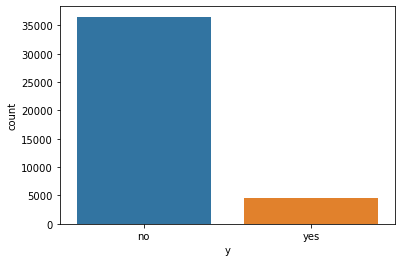

In [31]:
sns.countplot(bank['y'])

Scikit learn accepts data in numeric format. Now, we'll have to convert the character variable into numeric. We'll use the labelencoder function.
In label encoding, each unique value of a variable gets assigned a number, i.e., let's say a variable color has four values ['red','green','blue','pink']. Label encoding this variable will return output as: red = 2 green = 0 blue = 1 pink = 3
Load sklearn and encode all object type variables

In [32]:
from sklearn import preprocessing
for x in bank.columns:
    if bank[x].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(bank[x].values))
        bank[x] = lbl.transform(list(bank[x].values))

**Let's check the changes applied to the dataset. It can be seen that all character variable were converted to numeric.**

In [33]:
bank.head()

,age,job,marital,education,default,loan,contact,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,1,261,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,1,149,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,0,1,226,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,1,151,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,2,1,307,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0


**Statistics such as count, mean, std, etc done on the numeric dataset with values rounded to the nearest whole number.**

In [34]:
round(bank.describe())

,age,job,marital,education,default,loan,contact,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41164.0,41164.0,41164.0,41164.0,41164.0,41164.0,41164.0,41164.0,41164.0,41164.0,41164.0,41164.0,41164.0,41164.0,41164.0,41164.0,41164.0
mean,40.0,4.0,1.0,4.0,0.0,0.0,0.0,258.0,3.0,0.0,1.0,0.0,94.0,-41.0,4.0,5167.0,0.0
std,10.0,4.0,1.0,2.0,0.0,1.0,0.0,259.0,3.0,0.0,0.0,2.0,1.0,5.0,2.0,72.0,0.0
min,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-3.0,92.0,-51.0,1.0,4964.0,0.0
25%,32.0,0.0,1.0,2.0,0.0,0.0,0.0,102.0,1.0,0.0,1.0,-2.0,93.0,-43.0,1.0,5099.0,0.0
50%,38.0,2.0,1.0,3.0,0.0,0.0,0.0,180.0,2.0,0.0,1.0,1.0,94.0,-42.0,5.0,5191.0,0.0
75%,47.0,7.0,2.0,6.0,0.0,0.0,1.0,319.0,3.0,0.0,1.0,1.0,94.0,-36.0,5.0,5228.0,0.0
max,98.0,11.0,3.0,7.0,2.0,2.0,1.0,4918.0,56.0,7.0,2.0,1.0,95.0,-27.0,5.0,5228.0,1.0


The target variable 'y' has two outcomes '0' or '1'. '0' represents 'no' as in a subscription wasn't sold to a customer and '1' represents 'yes', a subscription was sold.
Here we have the the counts for each outcome.

In [35]:
bank.y.value_counts()

0    36526
1     4638
Name: y, dtype: int64

**This countplot shows the count of each outcome, '0' and '1' in the target variable.**

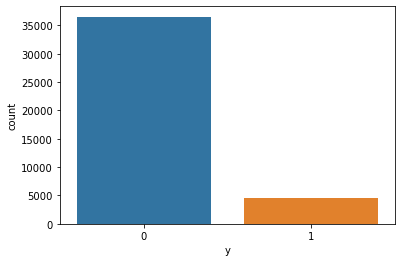

In [36]:
sns.countplot(bank['y'])

**Converting the bank dataset into a DataFrame.**

In [37]:
df=pd.DataFrame(bank)

# Performing a Correlation Analysis on the Banking Dataset 

In [38]:
C=df.corr()

Setting significant figure to 1 and applying colour backgrounds to the correlation between variables depending on strong positive, strong negative, weak positive, weak negative and no correlation.
Positive correlation between the target variable 'y' and duration and the target variable 'y' and previous.

In [39]:
C.style.background_gradient(cmap='coolwarm').set_precision(1)

,age,job,marital,education,default,loan,contact,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.0,0.0,-0.4,-0.1,0.2,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.1,0.0,-0.0,0.0
job,0.0,1.0,0.0,0.1,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.1,-0.0,-0.0,0.0
marital,-0.4,0.0,1.0,0.1,-0.1,0.0,-0.1,0.0,-0.0,0.0,0.0,-0.1,-0.1,-0.0,-0.1,-0.1,0.0
education,-0.1,0.1,0.1,1.0,-0.2,0.0,-0.1,-0.0,0.0,0.0,0.0,-0.0,-0.1,0.1,-0.0,-0.0,0.1
default,0.2,-0.0,-0.1,-0.2,1.0,-0.0,0.1,-0.0,0.0,-0.1,0.0,0.2,0.2,0.0,0.2,0.2,-0.1
loan,-0.0,-0.0,0.0,0.0,-0.0,1.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0
contact,0.0,-0.0,-0.1,-0.1,0.1,-0.0,1.0,-0.0,0.1,-0.2,0.1,0.4,0.6,0.3,0.4,0.3,-0.1
duration,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,1.0,-0.1,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.4
campaign,0.0,-0.0,-0.0,0.0,0.0,0.0,0.1,-0.1,1.0,-0.1,0.0,0.2,0.1,-0.0,0.1,0.1,-0.1
previous,0.0,0.0,0.0,0.0,-0.1,-0.0,-0.2,0.0,-0.1,1.0,-0.3,-0.4,-0.2,-0.1,-0.5,-0.5,0.2


# Split our dataset into its attributes and labels

In [40]:
X = bank.drop('y', axis = 1)
y = bank['y']

**Let's see what y looks like**

In [41]:
y.tail()

41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, dtype: int64

# Logistic Regression
**We will divide our dataset into training and test splits.**

The training data will be used to train the logistic regression model and the test data will be used to evaluate the performance of the model.
Splits 90% of the dataset into our training set and the other 10% into test data.

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

**Applying standard scaling to get optimized result**

In [43]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

**Train the logistic regression model and start making predictions using Scikit-Learn**

In [44]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

When our logistic regression model predicted y is going to be ‘no’ (0), it is accurate 93% of the time, ‘yes’ (1) is predicted with 69% precision. 
In Recall, if the client didn’t subscribe to a term deposit - ‘no’ in the test set our logistic regression model can identify it 98% of the time; if the client did subscribe - ‘yes’ is predicted 40% of the time.
Logistic regression model gets 90% accuracy overall.

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      3647
           1       0.66      0.38      0.48       470

    accuracy                           0.91      4117
   macro avg       0.79      0.68      0.72      4117
weighted avg       0.89      0.91      0.90      4117



# Random Forest Classifier

**Splits 90% of the dataset into our training set and the other 10% into test data.**
The random_state parameter which controls the randomness of the bootstrapping of the samples used when building trees and the sampling of the features to consider when looking for the best split at each node was set to 0. 

In [46]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

**Applying standard scaling to get optimized result**

In [47]:
sc2 = StandardScaler()
X2_train = sc2.fit_transform(X2_train)
X2_test = sc2.fit_transform(X2_test)

**Train the random forest classifier and start making predictions using Scikit-Learn**

The number of trees (n_estimators) was set to 200 since if there are more trees it will not allow overfitting trees in the model.

In [48]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X2_train, y2_train)
pred_rfc = rfc.predict(X2_test)

When our random forest classifier predicted y is going to be ‘no’ (0), it is accurate 94% of the time, ‘yes’ (1) is predicted with 63% precision. 
In Recall, if the client didn’t subscribe to a term deposit - ‘no’ in the test set our random forest classifier can identify it 96% of the time; if the client did subscribe - ‘yes’ is predicted 52% of the time.
Random Forest Classifier gets 91% accuracy overall.

In [49]:
print(classification_report(y2_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      3665
           1       0.64      0.52      0.57       452

    accuracy                           0.91      4117
   macro avg       0.79      0.74      0.76      4117
weighted avg       0.91      0.91      0.91      4117

